In [1]:
import netCDF4 as nc
import numpy as np
import pylab as plt
import pandas as pd
import datetime

In [2]:
disk = '/gws/nopw/j04/htap2/ptg21/'

In [4]:
nyrs=17
## Ox PRODUCTION
def prod_loss(disk='/gws/nopw/j04/htap2/ptg21/', jobid='u-cb159', nyrs=20):
    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_ho2no_tot.nc')
    p1 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_meo2no_tot.nc')
    p2 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_ro2no_tot.nc')
    p3 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_ohrcooh_tot.nc')
    p4 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_ohrono2_tot.nc')
    p5 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_hvrono2_tot.nc')
    p6 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_ohpan_tot.nc')
    p7 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    prod = p1 + p2 + p3 + p4 + p5 + p6 + p7

    # ## Ox LOSS
    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_o1dh2o_tot.nc')
    l1 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_mlr_tot.nc')
    l2 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_ho2o3_tot.nc')
    l3 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_oho3_tot.nc')
    l4 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_o3alk_tot.nc')
    l5 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_n2o5h2o.nc')
    l6 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_no3loss_tot.nc')
    l7 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)

    loss = l1 + l2 + l3 + l4 + l5  + l6 + l7 

    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_noywd_ann_tot.nc')
    d1 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)
    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_noydd_ann_tot.nc')
    d2 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)
    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_o3dd_ann_tot.nc')
    d3 = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)
    dtot=d1+d2+d3
    
    ncfile=nc.Dataset(disk+'/'+jobid+'/'+jobid+'_ste_ann_tot.nc')
    ste = np.array(ncfile.variables['__xarray_dataarray_variable__'][-12*nyrs:], dtype=np.float64)
    dtot=d1+d2+d3

    return prod/1e9, loss/1e9, dtot/1e9, ste/1e9

In [18]:
cq029p, cq029l, cq029d, cq029s = prod_loss(disk,'u-cq029', 17)
cq029_index = pd.date_range(start='1995-6-01', end='2012-06-01', freq='12M')
cq029 = pd.DataFrame(zip(cq029p, cq029l, cq029d, cq029s), columns=['O3P','O3L', 'O3DD', 'O3STE'], index=cq029_index)

cq041p, cq041l, cq041d, cq041s = prod_loss(disk, 'u-cq041', 17)
cq041_index = pd.date_range(start='1995-6-01', end='2012-06-01', freq='12M')
cq041 = pd.DataFrame(zip(cq041p, cq041l, cq041d, cq041s), columns=['O3P','O3L', 'O3DD', 'O3STE'], index=cq041_index)

cb159p, cb159l, cb159d, cb159s = prod_loss(disk, 'u-cb159', 19)
cb159_index = pd.date_range(start='1995-06-01', end='2014-06-01', freq='12M')
cb159 = pd.DataFrame(zip(cb159p, cb159l, cb159d, cb159s), columns=['O3P','O3L', 'O3DD', 'O3STE'], index=cb159_index)

cq330p, cq330l, cq330d, cq330s = prod_loss(disk, 'u-cq330', 6)
cq330_index = pd.date_range(start='2006-06-01', end='2014-06-01', freq='12M')
cq330 = pd.DataFrame(zip(cq330p, cq330l, cq330d, cq330s), columns=['O3P','O3L', 'O3DD', 'O3STE'], index=cq330_index)

cq393p, cq393l, cq393d, cq393s = prod_loss(disk, 'u-cq393', 9)
cq393_index = pd.date_range(start='1995-06-01', end='2004-06-01', freq='12M')
cq393 = pd.DataFrame(zip(cq393p, cq393l, cq393d, cq393s), columns=['O3P','O3L', 'O3DD', 'O3STE'], index=cq393_index)

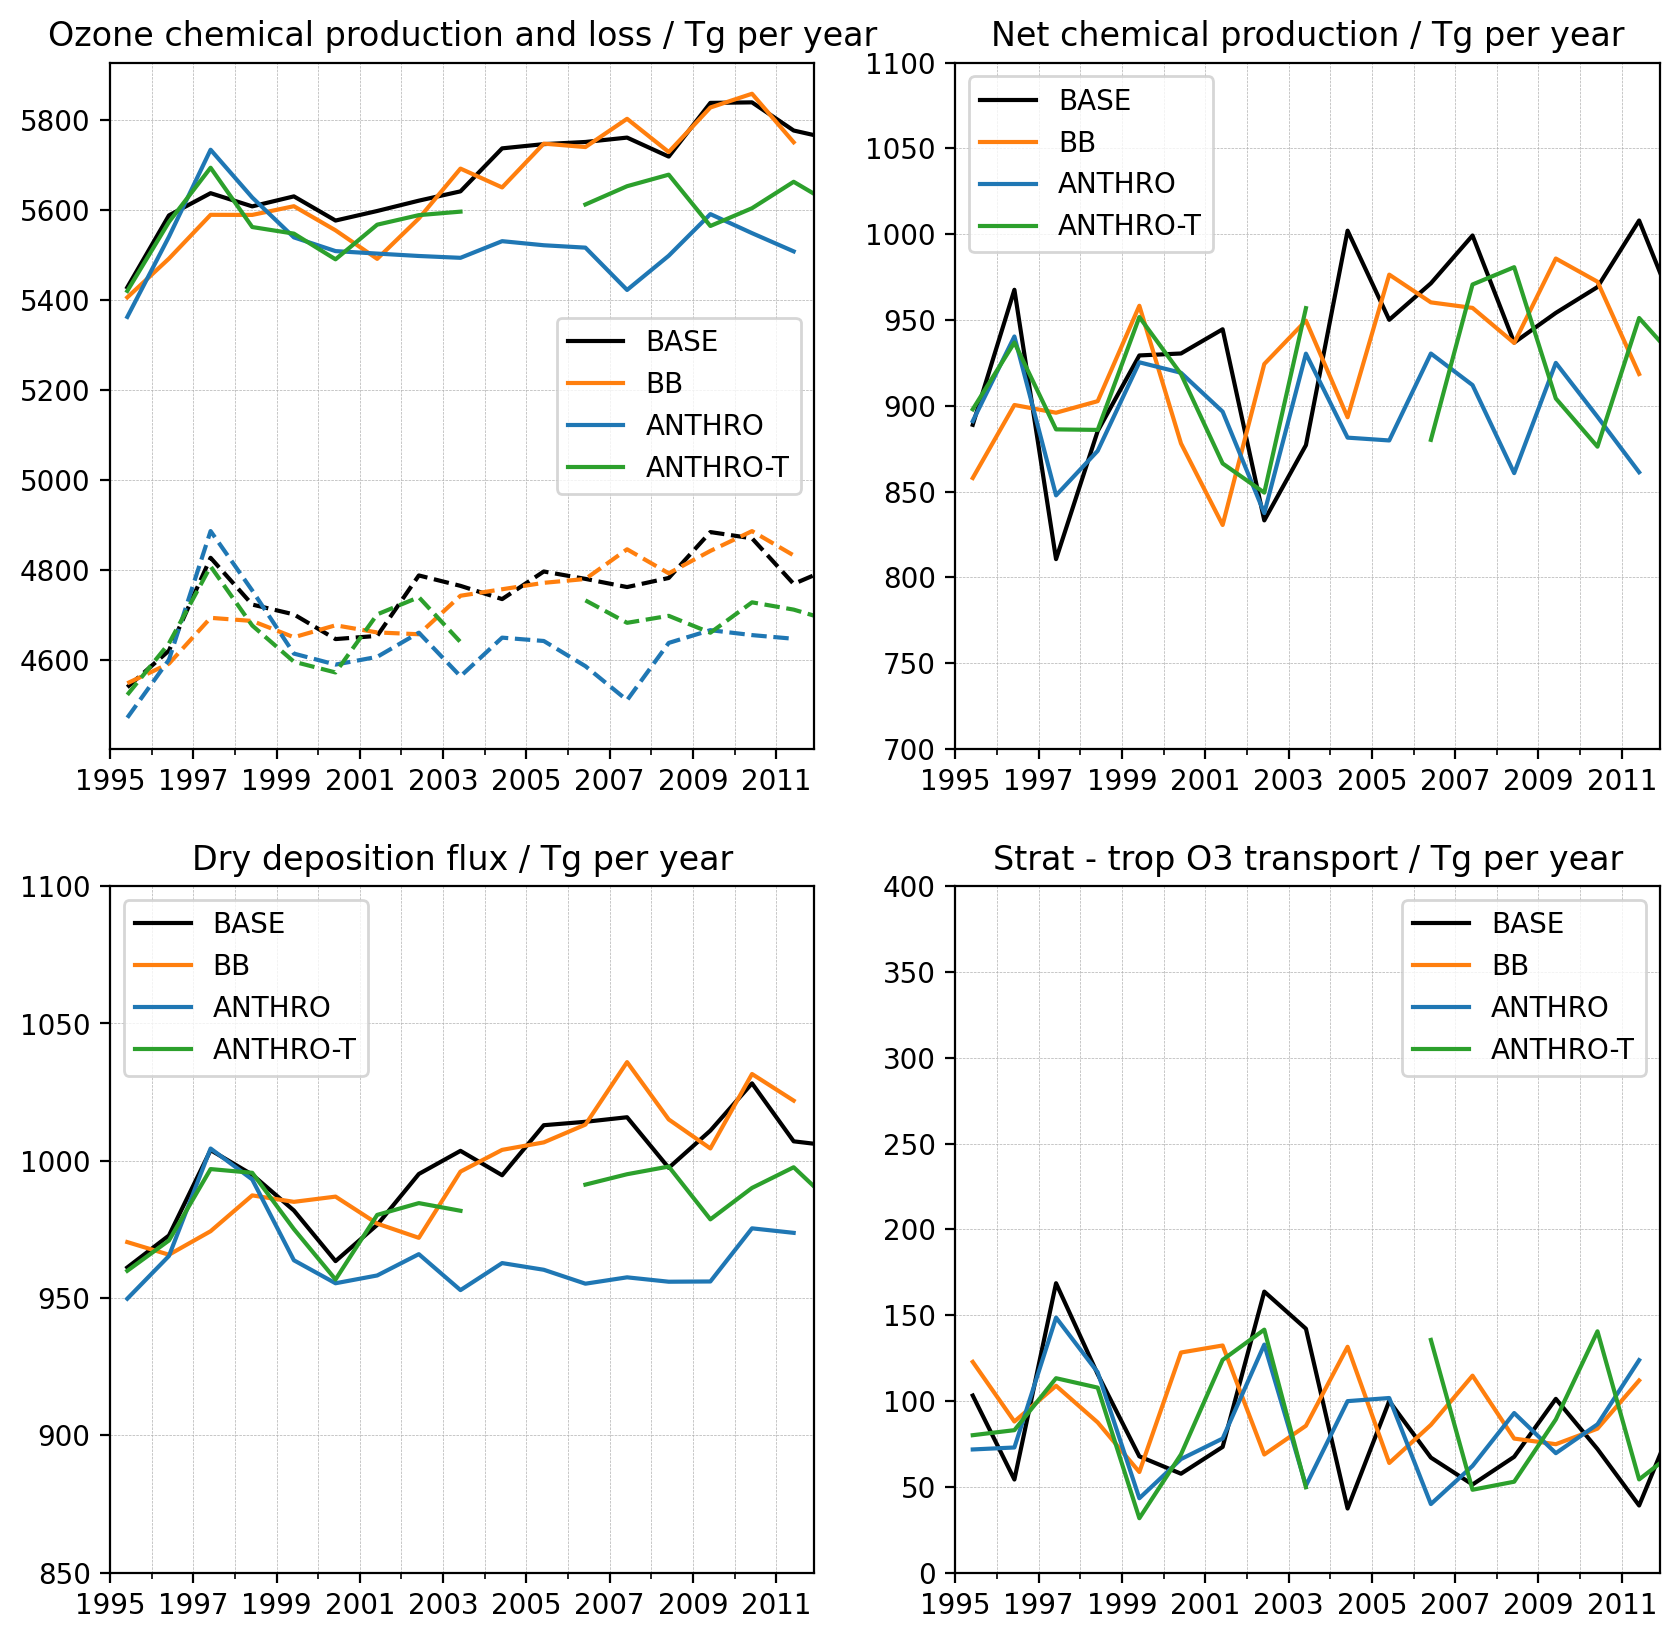

In [23]:
cmap = plt.get_cmap("tab10")
fig=plt.figure(figsize=(10,10), dpi=200)
plt.subplot(2,2,1)
ax=cb159.O3P.plot(color='k', label='BASE')
cb159.O3L.plot(color='k', linestyle='--', label='')

cq041.O3P.plot(color=cmap(1), label='BB')
cq041.O3L.plot(color=cmap(1), linestyle='--', label='')

cq029.O3P.plot(color=cmap(0), label='ANTHRO')
cq029.O3L.plot(color=cmap(0), linestyle='--', label='')

cq330.O3P.plot(color=cmap(2), label='ANTHRO-T')
cq330.O3L.plot(color=cmap(2), linestyle='--', label='')


cq393.O3P.plot(color=cmap(2), label='')
cq393.O3L.plot(color=cmap(2), linestyle='--', label='')

ax.grid(True, which='both', linestyle='--', linewidth=0.25)
ax.set_xlim([datetime.date(1995, 1, 1), datetime.date(2011, 12, 31)])
plt.title('Ozone chemical production and loss / Tg per year')
plt.legend()

plt.subplot(2,2,2)
ax = (cb159.O3P-cb159.O3L).plot(color='k', label='BASE')
(cq041.O3P-cq041.O3L).plot(color=cmap(1), label='BB')
(cq029.O3P-cq029.O3L).plot(color=cmap(0), label='ANTHRO')
(cq330.O3P-cq330.O3L).plot(color=cmap(2), label='ANTHRO-T')
(cq393.O3P-cq393.O3L).plot(color=cmap(2), label='')

ax.grid(True, which='both', linestyle='--', linewidth=0.25)
ax.set_ylim(700,1100)
ax.set_xlim([datetime.date(1995, 1, 1), datetime.date(2011, 12, 31)])
plt.title('Net chemical production / Tg per year')
plt.legend()

plt.subplot(2,2,3)
ax=cb159.O3DD.plot(color='k', label='BASE')
cq041.O3DD.plot(color=cmap(1), label='BB')
cq029.O3DD.plot(color=cmap(0), label='ANTHRO')
cq330.O3DD.plot(color=cmap(2), label='ANTHRO-T')
cq393.O3DD.plot(color=cmap(2), label='')
ax.grid(True, which='both', linestyle='--', linewidth=0.25)
ax.set_ylim(850,1100)
ax.set_xlim([datetime.date(1995, 1, 1), datetime.date(2011, 12, 31)])
plt.title('Dry deposition flux / Tg per year')
plt.legend()

plt.subplot(2,2,4)
ax=cb159.O3STE.plot(color='k', label='BASE')
cq041.O3STE.plot(color=cmap(1), label='BB')
cq029.O3STE.plot(color=cmap(0), label='ANTHRO')
cq330.O3STE.plot(color=cmap(2), label='ANTHRO-T')
cq393.O3STE.plot(color=cmap(2), label='')
ax.grid(True, which='both', linestyle='--', linewidth=0.25)
ax.set_ylim(0,400)
ax.set_xlim([datetime.date(1995, 1, 1), datetime.date(2011, 12, 31)])
plt.title('Strat - trop O3 transport / Tg per year')
plt.legend()
